In [1]:
from maser.data.cdpp.cdpp import CDPPWebService
from maser.data.cdpp.interball.polrad import load_int_aur_polrad_from_webservice, read_int_aur_polrad
import dateutil.parser
import numpy
import datetime
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def get_cdpp_webservice_credential():
    return 'cecconi', '15cbf9c26415c82579c045161bb1248d'

In [3]:
cdpp_user, cdpp_pswd = get_cdpp_webservice_credential()
c = CDPPWebService()
c.connect(cdpp_user, cdpp_pswd)
all_files = c.get_files('DA_TC_INT_AUR_POLRAD_RSP')

In [4]:
start_time = dateutil.parser.parse('1997-11-16T08:30:00.000')
end_time = dateutil.parser.parse('1997-11-16T11:00:00.000')

In [5]:
file_sel = []
for cur_file in all_files:
    if cur_file['start_time'] < end_time and cur_file['stop_time'] > start_time:
        file_sel.append(cur_file['name'])

In [6]:
file_sel

['POLR_RSPN2_19971116']

In [7]:
c = load_int_aur_polrad_from_webservice(file_sel[0], cdpp_user, cdpp_pswd)

In [8]:
c.file

'/Users/baptiste/Projets/VOParis/MASER/ipynb/INTERBALL/POLRAD/DA_TC_INT_AUR_POLRAD_RSP/POLR_RSPN2_19971116'

In [9]:
o = read_int_aur_polrad(c.file)

In [10]:
ss = []
for i in range(len(o)):
    # looping on all sweeps
    s = o.get_single_sweep(i)
    if len(s.data['EX'])>0 and len(s.data['EY'])>0 and len(s.data['EZ'])>0:
        # selecting only sweeps with 3 antenna measurements
        ss.append(s)

In [11]:
tt = [s.get_datetime() for s in ss]
ff = ss[0].freq

In [12]:
Px = numpy.array([s.data['EX'] for s in ss]).transpose()
Py = numpy.array([s.data['EY'] for s in ss]).transpose()
Pz = numpy.array([s.data['EZ'] for s in ss]).transpose()
P0 = Px + Py + Pz

In [13]:
sin2_th = (2 * Px / P0)
cos2_ph = (P0 - 2 * Pz)/(2 * Px)

In [14]:
print(P0.shape)
print()

(240, 2635)

(31200.0, 38400.0)

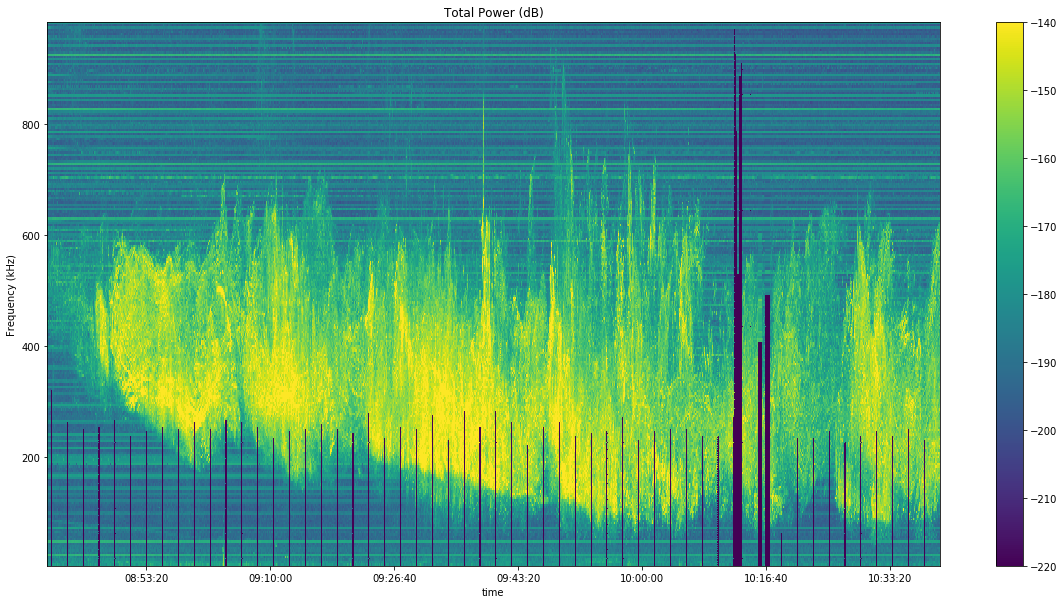

In [135]:
plt.figure(figsize=(20,10))
plt.pcolormesh([dt.time() for dt in tt],ff,10*numpy.log10(P0), vmin=-220, vmax=-140)
plt.colorbar()
plt.title('Total Power (dB)')
plt.ylabel('Frequency (kHz)')
plt.xlim((datetime.time(8,40),datetime.time(10,40)))

(31200.0, 38400.0)

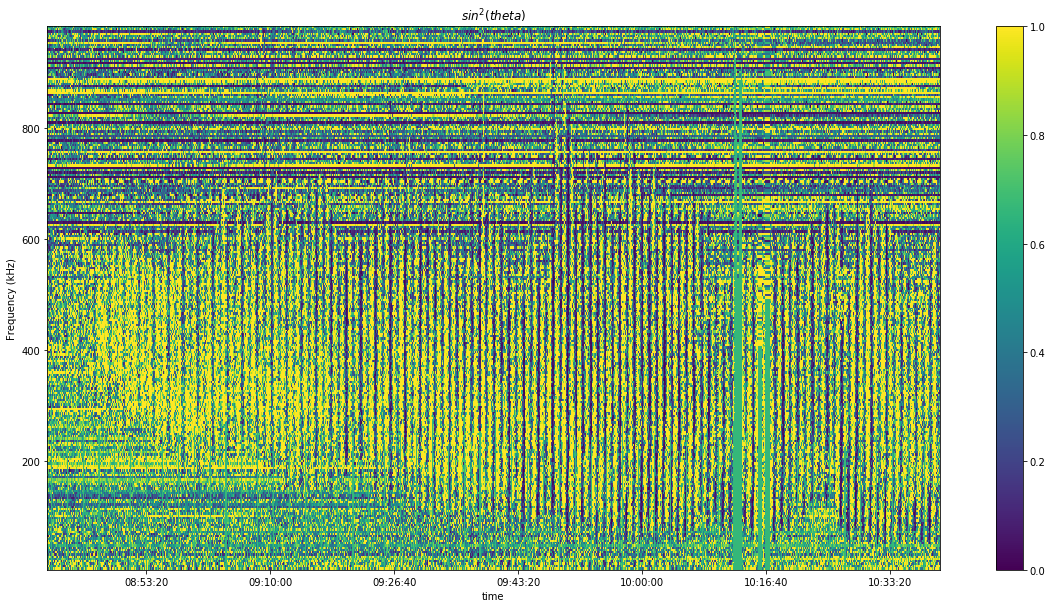

In [130]:
plt.figure(figsize=(20,10))
plt.pcolormesh([dt.time() for dt in tt],ff,sin2_th, vmin=0, vmax=1)
plt.colorbar()
plt.title('$sin^2(theta)$')
plt.ylabel('Frequency (kHz)')
plt.xlim((datetime.time(8,40),datetime.time(10,40)))

(31200.0, 38400.0)

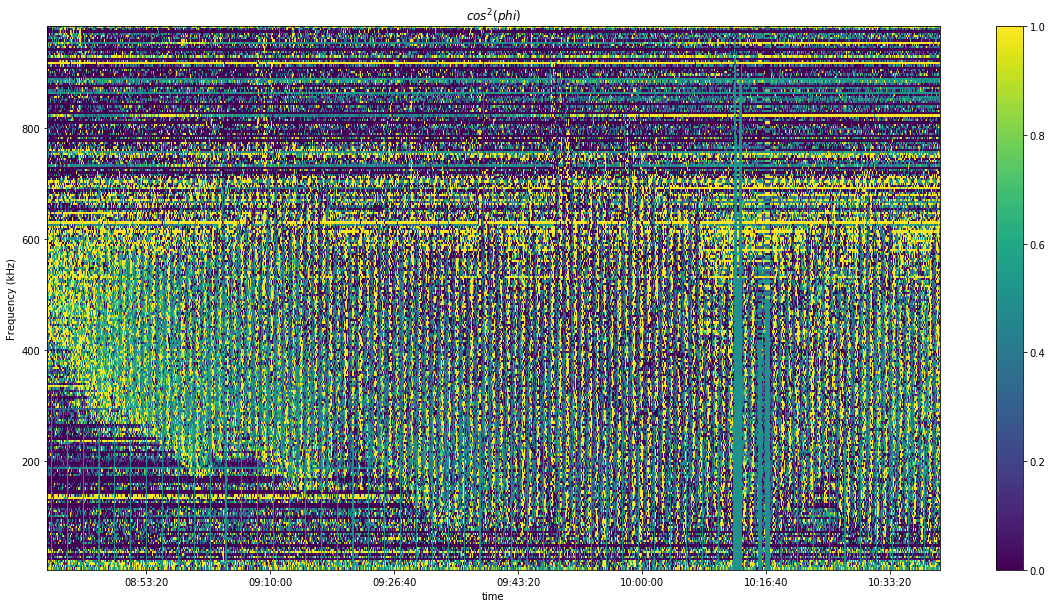

In [131]:
plt.figure(figsize=(20,10))
plt.pcolormesh([dt.time() for dt in tt],ff,cos2_ph, vmin=0, vmax=1)
plt.colorbar()
plt.title('$cos^2(phi)$')
plt.ylabel('Frequency (kHz)')
plt.xlim((datetime.time(8,40),datetime.time(10,40)))